# Генеративная модель на основе гауссовых смесей

Гауссовы смеси — естественное математическое обобщение алгоритма `K-means`. По сути, подход ищет не просто какие-то кучки вокруг формирующихся центроидов, а некоторую смесь многомерных нормальных распределений (по сути — тоже кучки вокруг средних со своими дисперсиями). Так как такой подход оценивает плотности распределений, то он часто используется в задачах KDE (kernel density estimation). В том числе, он может быть применен к задаче генерации: если есть плотность распределения, то можно семплировать и получать новые объекты. Давайте посмотрим на простейший пример решения такой задачи.

Работать будем опять-таки с `MNIST`. Так как модель оказывается крайне тяжеловесной, будем использовать «простой» набор данных. Визуализируем элементы этого набора данных (для наглядности)

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

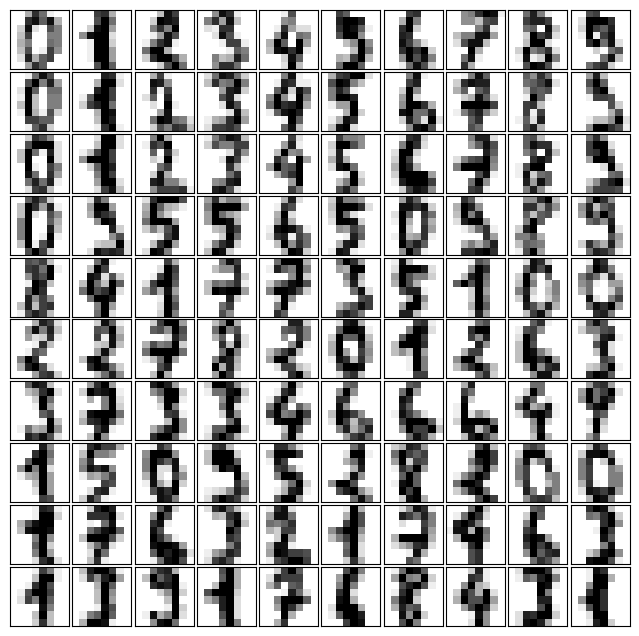

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

Для того, чтобы обучение проходило быстрее имеет смысл снизить размерность пространства признаков. Произведите преобразования для всего набора данных помощи <code>PCA(n_components=0.99, svd_solver=='full')</code>.


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, svd_solver='full')
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

Введите число полученных ГК

In [4]:
print(data.shape[1])

41


Обучим интересующую нас модель, подобрав гиперпараметр, отвечающий за число используемых компонент, минимизируя <a href="https://ru.wikipedia.org/wiki/Информационный_критерий_Акаике">информационный критерий Акаике</a>.

Для значений параметра <code>n_components</code> в диапазоне $[50,250)$ с шагом $10$ обучите модели <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html"><code>GaussianMixture</code></a> с параметрами, указанными в вашем задании. При помоши метода <code>.aic()</code> вычислите значение критерия каждой модели.

Введите значение <code>n_components</code> модели с наименьшим значением критерия Акаике.




In [5]:
from sklearn import mixture
import numpy as np
from tqdm.notebook import tqdm

random_state = 41

n_components = np.arange(50, 250, 10)
gmn_models = [mixture.GaussianMixture(n_components=n, covariance_type='full', random_state=random_state) for n in n_components]
aics = [model.fit(data).aic(data) for model in tqdm(gmn_models)]
best_n_components = n_components[np.argmin(aics)]
print(best_n_components)

  0%|          | 0/20 [00:00<?, ?it/s]

180


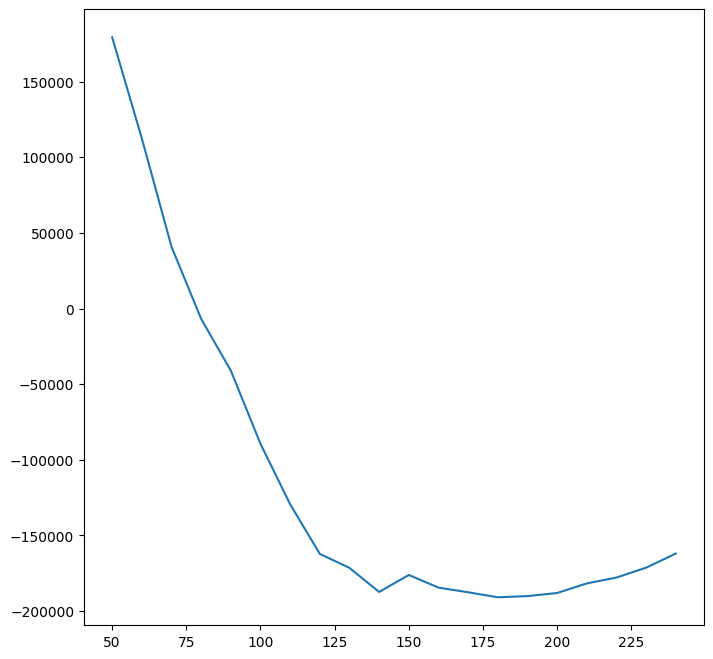

In [6]:
plt.figure(figsize=(8,8))
plt.plot(n_components, aics)

Обучите финальную модель на подобранном гиперпараметре. Проверьте, что обучение сошлось (поле <code>.converged_</code> модели).

In [7]:
final_model = mixture.GaussianMixture(best_n_components, covariance_type='full', random_state=random_state)
final_model.fit(data)
print(final_model.converged_)

True


При помощи метода <code>.sample()</code> сгенерируйте $100$ новых объектов.

Введите выборочное среднее коориднаты с индексом $0$ сгенерированных объектов.

In [8]:
data_new, _ = final_model.sample(100)
print(data_new[:,0].mean())

0.048110004669747436


При помоши метода <code>.inverse_transform()</code> класса <code>PCA</code> верните сгенерированные объекты в пространство исходных признаков.

In [9]:
digits_new = pca.inverse_transform(data_new)

Визуализируйте полученные результаты. Введите номер изображения, соответствующего сгенерированному объекту с индексом $5$ (индексация начинается с нуля)

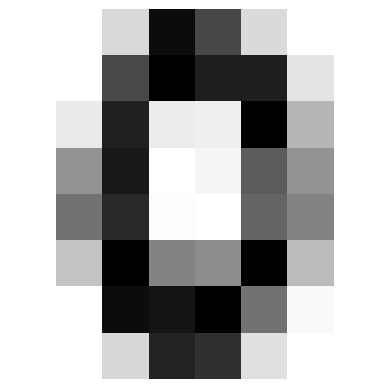

In [11]:
plt.imshow(digits_new[17].reshape(8,8), cmap='binary')
plt.axis('off')
plt.clim(0, 16)